# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import matplotlib.ticker as ticker

%matplotlib notebook

In [48]:
tariffs = pd.read_excel("bown-2020-02-14.xlsx")
#Dates are listed in time-series format with dates acoross the columns.

tariffs = tariffs.iloc[0:2].transpose()
#transpose the rows and columns

tariffs.columns = tariffs.iloc[0]
#set the header as the first row of the transposed data

tariffs = tariffs.iloc[1:]
#remove the header row from the data

Date_test = (tariffs
             .index
             .str
             .findall(r"(?:January|February|March|April|May|June|July|August|September|October|November|December)[/\s]?(?:\d{1,2})?[,]?[\s]?(?:\d{4})"))
#use regex to find all the dates from messy data column

tariffs.index = pd.to_datetime([Date[0] for Date in Date_test])
#use dates found with regex to create a datetime index

print(tariffs)

Unnamed: 0 China's tariff on US exports US tariff on Chinese exports
2018-01-01                            8                          3.1
2018-02-07                            8                          3.2
2018-03-23                            8                          3.8
2018-04-02                          8.4                          3.8
2018-05-01                          8.3                          3.8
2018-07-01                          7.2                          3.8
2018-07-06                         10.1                          6.7
2018-08-23                         14.4                          8.2
2018-09-24                         18.3                           12
2018-11-01                         18.2                           12
2019-01-01                         16.5                           12
2019-02-07                         16.5                           12
2019-06-01                         20.7                         17.6
2019-07-01                        

In [51]:
QGDP_MI = pd.read_csv("SQGDP1_MI_2005_2019.csv")

QGDP_MI = pd.DataFrame(QGDP_MI.iloc[2,8:])

QGDP_MI.index = (pd.PeriodIndex(QGDP_MI.index.str.replace(':','-'), 
                                freq = 'Q')
                 .to_timestamp())
#re-format dates so they can be processed by pd.PeriodIndex then convert to timestamp

QGDP_MI.rename(columns = {2:"Currency"}, inplace = True)

GDP_Currency = QGDP_MI["Currency"]
GDP_Change = [0]

for i in range(len(GDP_Currency)-1):
    GDP_Change.append(((GDP_Currency[i+1] - GDP_Currency[i])/ GDP_Currency[i])*100)
    #calculate quarterly GDP change
    
QGDP_MI["GDP_%_Change"] = GDP_Change

QGDP_MI = QGDP_MI.loc[QGDP_MI.index >= "2018-01"]

print(QGDP_MI)

           Currency  GDP_%_Change
2018-01-01   519926      1.381263
2018-04-01   526009      1.169916
2018-07-01   530614      0.875423
2018-10-01   531835      0.230205
2019-01-01   534427      0.487313
2019-04-01   539232      0.899094
2019-07-01   543976      0.879919


In [69]:
QPI_MI = pd.read_csv('SQINC4_MI_1948_2019.csv')

QPI_MI = pd.DataFrame(QPI_MI.iloc[4,8:])

QPI_MI.index = (pd.PeriodIndex(QPI_MI.index.str.replace(':','-'),
                              freq = 'Q')
                .to_timestamp())

QPI_MI.rename(columns = {4:"Personal Income"}, 
              inplace = True)

QPI_MI = QPI_MI.loc[QPI_MI.index>= "2010-01"]

Personal_Income = QPI_MI['Personal Income']
PI_Change = [0]

for i in range(len(Personal_Income)-1):
    PI_Change.append(((Personal_Income[i+1] - Personal_Income[i]) / Personal_Income[i])*100)
    
QPI_MI["Personal_Income_Change"] = PI_Change
QPI_MI = QPI_MI.loc[QPI_MI.index>="2018-01"]

print(QPI_MI)

           Personal Income  Personal_Income_Change
2018-01-01           47914                2.066292
2018-04-01           48171                0.536378
2018-07-01           48648                0.990222
2018-10-01           48931                0.581730
2019-01-01           49449                1.058634
2019-04-01           49999                1.112257
2019-07-01           50372                0.746015


In [72]:
total_sa = pd.read_csv('TOTALSA.csv')
total_sa["DATE"] = pd.to_datetime(total_sa["DATE"])
total_sa = total_sa.loc[total_sa["DATE"] >= "2018-01"]

print(total_sa)

          DATE  TOTALSA
504 2018-01-01   17.552
505 2018-02-01   17.555
506 2018-03-01   17.695
507 2018-04-01   17.774
508 2018-05-01   17.778
509 2018-06-01   17.701
510 2018-07-01   17.384
511 2018-08-01   17.361
512 2018-09-01   17.842
513 2018-10-01   17.999
514 2018-11-01   17.880
515 2018-12-01   17.886
516 2019-01-01   17.238
517 2019-02-01   17.026
518 2019-03-01   17.773
519 2019-04-01   17.049
520 2019-05-01   17.933
521 2019-06-01   17.705
522 2019-07-01   17.442
523 2019-08-01   17.512
524 2019-09-01   17.723
525 2019-10-01   17.046
526 2019-11-01   17.447
527 2019-12-01   17.159
528 2020-01-01   17.361
529 2020-02-01   17.295


<IPython.core.display.Javascript object>


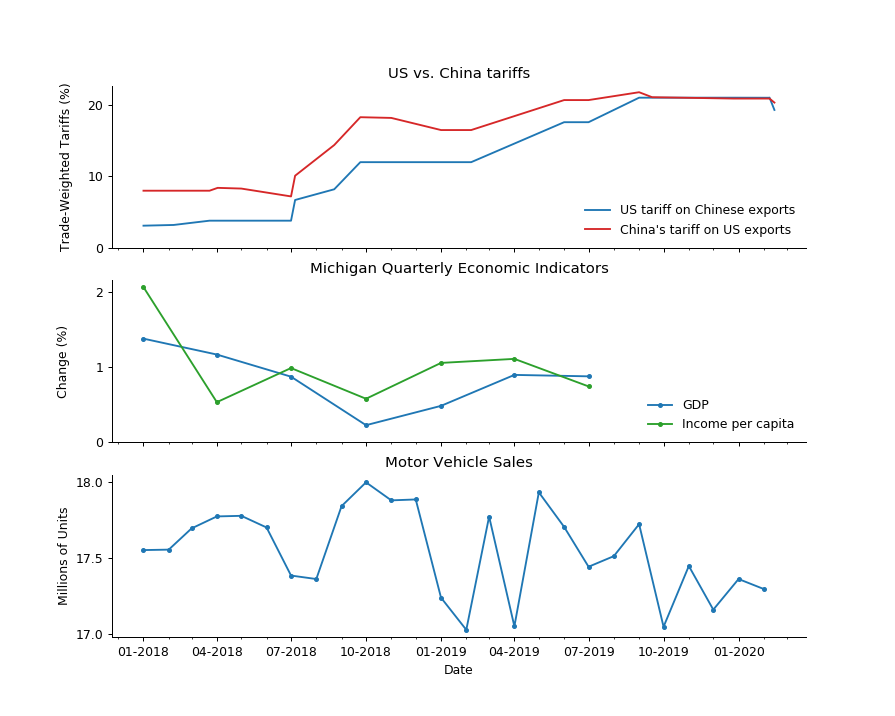

In [96]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize = (10,8), sharex = True)

US_tariff, = ax1.plot(tariffs.index,tariffs['US tariff on Chinese exports'], color = 'tab:blue')
China_tariff, = ax1.plot(tariffs.index,tariffs["China's tariff on US exports"], color = 'tab:red')

# ax1.fill_between(tariffs.index,
#                  tariffs["China's tariff on US exports"],
#                  tariffs['US tariff on Chinese exports'], 
#                  facecolor = 'lightcoral', 
#                  alpha = 0.25)

# ax1.fill_between(tariffs.index,tariffs["US tariff on Chinese exports"],0, facecolor = 'dodgerblue', alpha = 0.25)

ax1.legend((US_tariff, China_tariff),
           ("US tariff on Chinese exports",
            "China's tariff on US exports"), 
           frameon = False, 
           loc = 'lower right')

ax1.set_ylabel("Trade-Weighted Tariffs (%)", labelpad = 12.0)
ax1.set_title("US vs. China tariffs")
ax1.set_yticks([0.0,10.0,20.0])

MI_GDP_Growth, = ax2.plot(QGDP_MI.index,QGDP_MI["GDP_%_Change"], marker = '.', color = 'tab:blue')

MI_Income_Per_Capita_Growth, = ax2.plot(QPI_MI.index,
                                        QPI_MI["Personal_Income_Change"],
                                        marker = '.', 
                                        color = 'tab:green')

ax2.legend((MI_GDP_Growth, MI_Income_Per_Capita_Growth), 
           ("GDP","Income per capita"), 
           frameon = False, 
           loc = "lower right")

ax2.set_ylabel("Change (%)", labelpad = 20)
ax2.set_title("Michigan Quarterly Economic Indicators")
ax2.set_yticks([0,1,2])

ax3.plot(total_sa["DATE"],total_sa["TOTALSA"], marker = '.', color = 'tab:blue')

# years = mdates.YearLocator()
months = mdates.MonthLocator()
quarters = mdates.MonthLocator((1,4,7,10))
quarters_fmt = mdates.DateFormatter('%m-%Y')

ax3.xaxis.set_major_locator(quarters)
ax3.xaxis.set_major_formatter(quarters_fmt)
ax3.xaxis.set_minor_locator(months)

ax3.set_ylabel("Millions of Units")
ax3.set_title("Motor Vehicle Sales")
ax3.set_yticks([17,17.5,18])
ax3.set_xlabel("Date")

ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)